<center> <img src = https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/hh%20label.jpg alt="drawing" style="width:400px;">

# <center> Проект: Анализ вакансий на hh.ru
   

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import plotly
import plotly.express as px
print(plotly.__version__)

5.10.0


# Исследование структуры данных

Даннные для ноутбука лежат на Гуглдиске https://drive.google.com/drive/folders/1OLnUK65-OdUrAr482baVWQldp1P9XNtp?usp=sharing

1. Прочитайте данные с помощью библиотеки Pandas. Совет: перед чтением обратите внимание на разделитель внутри файла. 

In [2]:
hh_data=pd.read_csv('data/dst-3.0_16_1_hh_database.csv', sep=';', engine='python')

#hh_data=pd.read_csv('data/hh1_short.csv', sep=';')
hh_df = hh_data.copy()


2. Выведите несколько первых (последних) строк таблицы, чтобы убедиться в том, что ваши данные не повреждены. Ознакомьтесь с признаками и их структурой.

In [3]:
display(hh_df.head(5))

display(hh_df.tail(5))

display(hh_df.columns)

Пол, возраст           ЗП  \
0    Мужчина ,  39 лет , родился 27 ноября 1979   29000 руб.   
1     Мужчина ,  60 лет , родился 20 марта 1959   40000 руб.   
2  Женщина ,  36 лет , родилась 12 августа 1982   20000 руб.   
3      Мужчина ,  38 лет , родился 25 июня 1980  100000 руб.   
4     Женщина ,  26 лет , родилась 3 марта 1993  140000 руб.   

                           Ищет работу на должность:  \
0                            Системный администратор   
1                               Технический писатель   
2                                           Оператор   
3  Веб-разработчик (HTML / CSS / JS / PHP / базы ...   
4                  Региональный менеджер по продажам   

                        Город, переезд, командировки  \
0  Советск (Калининградская область) , не готов к...   
1  Королев , не готов к переезду , готов к редким...   
2  Тверь , не готова к переезду , не готова к ком...   
3  Саратов , не готов к переезду , готов к редким...   
4  Москва , не готова к переезду , готова к коман...   

                                           Занятость  \
0  частичная занятость, проектная работа, полная ...   
1  частичная занятость, проектная работа, полная ...   
2                                   полная занятость   
3  частичная занятость, проектная работа, полная ...   
4                                   полная занятость   

                                              График  \
0  гибкий график, полный день, сменный график, ва...   
1  гибкий график, полный день, сменный график, уд...   
2                                        полный день   
3                    гибкий график, удаленная работа   
4                                        полный день   

                                         Опыт работы  \
0  Опыт работы 16 лет 10 месяцев  Август 2010 — п...   
1  Опыт работы 19 лет 5 месяцев  Январь 2000 — по...   
2  Опыт работы 10 лет 3 месяца  Октябрь 2004 — Де...   
3  Опыт работы 18 лет 9 месяцев  Август 2017 — Ап...   
4  Опыт работы 5 лет 7 месяцев  Региональный мене...   

  Последнее/нынешнее место работы  \
0         МАОУ "СОШ № 1 г.Немана"   
1    Временный трудовой коллектив   
2                    ПАО Сбербанк   
3                        OpenSoft   
4                        Мармелад   

                       Последняя/нынешняя должность  \
0                           Системный администратор   
1  Менеджер проекта, Аналитик, Технический писатель   
2                               Кассир-операционист   
3                               Инженер-программист   
4                              Менеджер по продажам   

                                   Образование и ВУЗ Обновление резюме  \
0  Неоконченное высшее образование 2000  Балтийск...  16.04.2019 15:59   
1  Высшее образование 1981  Военно-космическая ак...  12.04.2019 08:42   
2  Среднее специальное образование 2002 Профессио...  16.04.2019 08:35   
3  Высшее образование 2002  Саратовский государст...  08.04.2019 14:23   
4  Высшее образование 2015 Кгу Психологии и педаг...  22.04.2019 10:32   

                             Авто  
0  Имеется собственный автомобиль  
1                      Не указано  
2                      Не указано  
3                      Не указано  
4                      Не указано

Пол, возраст           ЗП  \
44739    Мужчина ,  30 лет , родился 17 января 1989   50000 руб.   
44740      Мужчина ,  27 лет , родился 5 марта 1992   39000 руб.   
44741  Женщина ,  48 лет , родилась 26 декабря 1970   40000 руб.   
44742   Мужчина ,  24 года , родился 6 октября 1994   20000 руб.   
44743    Мужчина ,  38 лет , родился 25 апреля 1980  120000 руб.   

                               Ищет работу на должность:  \
44739  Финансист, аналитик, экономист, бухгалтер, мен...   
44740             Системный администратор, IT-специалист   
44741                         Аналитик данных, Математик   
44742                                   Контент-менеджер   
44743                               Руководитель проекта   

                            Город, переезд, командировки  \
44739  Тверь , готов к переезду (Москва, Химки) , гот...   
44740  Липецк , готов к переезду , готов к командировкам   
44741  Челябинск , готова к переезду , готова к редки...   
44742  Тамбов , не готов к переезду , не готов к кома...   
44743  Москва , не готов к переезду , не готов к кома...   

                                               Занятость  \
44739                                   полная занятость   
44740  проектная работа, частичная занятость, полная ...   
44741                                   полная занятость   
44742              частичная занятость, полная занятость   
44743                                   полная занятость   

                                                  График  \
44739                      полный день, удаленная работа   
44740  удаленная работа, гибкий график, полный день, ...   
44741                      полный день, удаленная работа   
44742                                   удаленная работа   
44743                                        полный день   

                                             Опыт работы  \
44739  Опыт работы 7 лет 7 месяцев  Финансист, аналит...   
44740  Опыт работы 7 лет  Системный администратор, IT...   
44741  Опыт работы 21 год 5 месяцев  Январь 1998 — по...   
44742  Опыт работы 3 года 10 месяцев  Контент-менедже...   
44743  Опыт работы 15 лет 10 месяцев  Руководитель пр...   

                         Последнее/нынешнее место работы  \
44739  ООО "IAS" (независимый участник объединения Ru...   
44740                                       ИП Пестрецов   
44741  ОАО «ЧМК», Исследовательско-Технологический Це...   
44742                                          IQ-Maxima   
44743                                  ПАО ГК ТНС энерго   

                    Последняя/нынешняя должность  \
44739                     Руководитель субгруппы   
44740                            Предприниматель   
44741                 Начальник группы аналитики   
44742                          Менеджер проектов   
44743  Руководитель отдела технической поддержки   

                                       Образование и ВУЗ Обновление резюме  \
44739  Высшее образование 2015  Московский гуманитарн...  22.04.2019 12:32   
44740  Высшее образование (Бакалавр) 2016  Воронежски...  22.04.2019 13:11   
44741  Высшее образование 2000  Южно-Уральский госуда...  09.04.2019 05:07   
44742  Высшее образование 2015  Тамбовский государств...  26.04.2019 14:25   
44743  Высшее образование 1997  Южно-Российский госуд...  05.07.2018 20:15   

                                 Авто  
44739                      Не указано  
44740                      Не указано  
44741                      Не указано  
44742  Имеется собственный автомобиль  
44743                      Не указано

Index(['Пол, возраст', 'ЗП', 'Ищет работу на должность:',
       'Город, переезд, командировки', 'Занятость', 'График', 'Опыт работы',
       'Последнее/нынешнее место работы', 'Последняя/нынешняя должность',
       'Образование и ВУЗ', 'Обновление резюме', 'Авто'],
      dtype='object')

3. Выведите основную информацию о числе непустых значений в столбцах и их типах в таблице.

In [4]:
display(hh_df.info())
display(hh_df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44744 entries, 0 to 44743
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Пол, возраст                     44744 non-null  object
 1   ЗП                               44744 non-null  object
 2   Ищет работу на должность:        44744 non-null  object
 3   Город, переезд, командировки     44744 non-null  object
 4   Занятость                        44744 non-null  object
 5   График                           44744 non-null  object
 6   Опыт работы                      44576 non-null  object
 7   Последнее/нынешнее место работы  44743 non-null  object
 8   Последняя/нынешняя должность     44742 non-null  object
 9   Образование и ВУЗ                44744 non-null  object
 10  Обновление резюме                44744 non-null  object
 11  Авто                             44744 non-null  object
dtypes: object(12)
memory usage: 2.0+

None

(44744, 12)

4. Обратите внимание на информацию о числе непустых значений.

In [5]:


coll_nill=hh_df.isnull()
#display(blank_data)
cols=coll_nill.columns
# В цикле выведем информацию о признаках с пропусками
for i in cols:
    gaps_count=coll_nill[coll_nill[i]][i].count()
    if gaps_count > 0:
        print(f"признак '{i}' содержит {gaps_count} пропуск(ов)")

признак 'Опыт работы' содержит 168 пропуск(ов)
признак 'Последнее/нынешнее место работы' содержит 1 пропуск(ов)
признак 'Последняя/нынешняя должность' содержит 2 пропуск(ов)


#### Вывод:
- присутствуют пропуски в полях "Опыт работы", "Последнее/нынешнее место работы" и "Последняя/нынешняя должность"

5. Выведите основную статистическую информацию о столбцах.


In [6]:
display(hh_df.describe())

Пол, возраст          ЗП  \
count                                           44744       44744   
unique                                          16003         690   
top     Мужчина ,  32 года , родился 17 сентября 1986  50000 руб.   
freq                                               18        4064   

       Ищет работу на должность:  \
count                      44744   
unique                     14929   
top      Системный администратор   
freq                        3099   

                             Город, переезд, командировки         Занятость  \
count                                               44744             44744   
unique                                              10063                38   
top     Москва , не готов к переезду , не готов к кома...  полная занятость   
freq                                                 1261             30026   

             График                                        Опыт работы  \
count         44744                                              44576   
unique           47                                              44413   
top     полный день  Опыт работы 10 лет 8 месяцев  Апрель 2018 — по...   
freq          22727                                                  3   

                          Последнее/нынешнее место работы  \
count                                               44743   
unique                                              30214   
top     Индивидуальное предпринимательство / частная п...   
freq                                                  935   

       Последняя/нынешняя должность  \
count                         44742   
unique                        16927   
top         Системный администратор   
freq                           2062   

                                        Образование и ВУЗ Обновление резюме  \
count                                               44744             44744   
unique                                              40148             18838   
top     Высшее образование 1987 Военный инженерный Кра...  07.05.2019 09:50   
freq                                                    4                25   

              Авто  
count        44744  
unique           2  
top     Не указано  
freq         32268

# Преобразование данных

1. Начнем с простого - с признака **"Образование и ВУЗ"**. Его текущий формат это: **<Уровень образования год выпуска ВУЗ специальность...>**. Например:
* Высшее образование 2016 Московский авиационный институт (национальный исследовательский университет)...
* Неоконченное высшее образование 2000  Балтийская государственная академия рыбопромыслового флота…
Нас будет интересовать только уровень образования.

Создайте с помощью функции-преобразования новый признак **"Образование"**, который должен иметь 4 категории: "высшее", "неоконченное высшее", "среднее специальное" и "среднее".

Выполните преобразование, ответьте на контрольные вопросы и удалите признак "Образование и ВУЗ".

Совет: обратите внимание на структуру текста в столбце **"Образование и ВУЗ"**. Гарантируется, что текущий уровень образования соискателя всегда находится в первых 2ух слов и начинается с заглавной буквы. Воспользуйтесь этим.

*Совет: проверяйте полученные категории, например, с помощью метода unique()*


In [7]:
# функция которая будет определять уровень образования и преобразовывать его в одну из 4 категорий
# "высшее", "неоконченное высшее", "среднее специальное" и "среднее"

def getEducation(string):
    """Функция определяет уровень образования по ключевым словам во входной строке

    Args:
        string ([string]): Строка, содержащая информацию об уровне образования из признака Образование и ВУЗ
    Returns:
        [string]:Уровень образования один из 4 возможных категорий: Высшее, Неоконченное высшее, среднее и среднее специальное
    """
    word1, word2, tail = string.split(maxsplit=2)
    if word1.find('Высшее') != -1:
        return 'высшее'
    elif word1.find('Неоконченное') != -1:
        return 'неоконченное высшее'
    elif word1.find('Среднее') != -1 and word2.find('специальное') != -1:
        return 'среднее специальное'
    elif word1.find('Среднее') != -1:
        return 'среднее'
    else:
        #return pd.NA
        return 'прочее'
       
# Создадим столбец "Образование"  и удалим исходный
hh_df['Образование'] = hh_df['Образование и ВУЗ'].apply(getEducation)     
hh_df = hh_df.drop(['Образование и ВУЗ'], axis=1)

In [8]:
# проверим результат и выполним задание 3.1
display(hh_df['Образование'].unique())
display(hh_df['Образование'].value_counts())
print(f"Средний уровень образования имеет {hh_df['Образование'].value_counts().loc['среднее']} соискателей")

array(['неоконченное высшее', 'высшее', 'среднее специальное', 'среднее'],
      dtype=object)

высшее                 33863
среднее специальное     5765
неоконченное высшее     4557
среднее                  559
Name: Образование, dtype: int64

Средний уровень образования имеет 559 соискателей


2. Теперь нас интересует столбец **"Пол, возраст"**. Сейчас он представлен в формате **<Пол , возраст , дата рождения >**. Например:
* Мужчина , 39 лет , родился 27 ноября 1979 
* Женщина , 21 год , родилась 13 января 2000
Как вы понимаете, нам необходимо выделить каждый параметр в отдельный столбец.

Создайте два новых признака **"Пол"** и **"Возраст"**. При этом важно учесть:
* Признак пола должен иметь 2 уникальных строковых значения: 'М' - мужчина, 'Ж' - женщина. 
* Признак возраста должен быть представлен целыми числами.

Выполните преобразование, ответьте на контрольные вопросы и удалите признак **"Пол, возраст"** из таблицы.

*Совет: обратите внимание на структуру текста в столбце, в части на то, как разделены параметры пола, возраста и даты рождения между собой - символом ' , '. 
Гарантируется, что структура одинакова для всех строк в таблице. Вы можете воспользоваться этим.*


In [9]:

# создадим  функцию для извлечения необходимой информации
def getGender(string):
    """Функция определяет пол по ключевым словам во входной строке

    Args:
        string ([string]): Строка, содержащая информацию о поле и возрасте
    Returns:
        gender:Пол один из 2 возможных категорий: М-мужчина или Ж-женщина 
    """
    
    gender, age, tail = string.split(sep=',', maxsplit=2)
    
    if gender.strip() == 'Мужчина':
        gender = 'М'
    else:
        gender = 'Ж'
        
    return gender

def getAge(string):
    """Функция определяет пол по ключевым словам во входной строке

    Args:
        string ([string]): Строка, содержащая информацию о поле и возрасте
    Returns:
        age: возраст
    """
    
    gender, age, tail = string.split(sep=',', maxsplit=2)
    age= int(age.strip().split()[0])
    
    return age

#print(getGender('Мужчина , 38 лет , родился 25 июня 1980'))
#print(getAge('Мужчина , 38 лет , родился 25 июня 1980'))
# Создадим новые признаки и удалим признак 'Пол, возраст'
hh_df['Пол'] = hh_df['Пол, возраст'].apply(getGender)
hh_df['Возраст'] = hh_df['Пол, возраст'].apply(getAge)
hh_df.drop(columns='Пол, возраст', inplace=True)


In [10]:
#задание 3.2
#print(f"Среди соискателей представленно {round(hh_df['Пол'].value_counts(normalize=True)*100, 2)}% резюме женщин")
print(f"Среди соискателей представленно {round(hh_df['Пол'].value_counts(normalize=True).loc['Ж']*100, 2)}% резюме женщин")
print(f"Средний возраст соискателей составляет {round(hh_df['Возраст'].mean(), 2)} года")

Среди соискателей представленно 19.07% резюме женщин
Средний возраст соискателей составляет 32.2 года


3. Следующим этапом преобразуем признак **"Опыт работы"**. Его текущий формат - это: **<Опыт работы: n лет m месяцев, периоды работы в различных компаниях…>**. 

Из столбца нам необходимо выделить общий опыт работы соискателя в месяцах, новый признак назовем "Опыт работы (месяц)"

Для начала обсудим условия решения задачи:
* Во-первых, в данном признаке есть пропуски. Условимся, что если мы встречаем пропуск, оставляем его как есть (функция-преобразование возвращает NaN)
* Во-вторых, в данном признаке есть скрытые пропуски. Для некоторых соискателей в столбце стоит значения "Не указано". Их тоже обозначим как NaN (функция-преобразование возвращает NaN)
* В-третьих, нас не интересует информация, которая описывается после указания опыта работы (периоды работы в различных компаниях)
* В-четвертых, у нас есть проблема: опыт работы может быть представлен только в годах или только месяцах. Например, можно встретить следующие варианты:
    * Опыт работы 3 года 2 месяца…
    * Опыт работы 4 года…
    * Опыт работы 11 месяцев…
    * Учитывайте эту особенность в вашем коде

Учитывайте эту особенность в вашем коде

В результате преобразования у вас должен получиться столбец, содержащий информацию о том, сколько месяцев проработал соискатель.
Выполните преобразование, ответьте на контрольные вопросы и удалите столбец **"Опыт работы"** из таблицы.


In [11]:
def getMonth(inputString):
    """ Парсинг и вычисление общего числа месяцев опыта

    Args:
        inputString (_type_): Строка с данными об опыте работы

    Returns:
        (int): общее колвичесвто месяцев опытв 
    """
    yearWords = ["год", "года", "лет"]
    monthWords = ["месяц", "месяцев", "месяца"]
    yearMonthSet = set(yearWords + monthWords)
    totalMonth = 0
    
   
    try:
        splitList = inputString.split(maxsplit=6)
        #print(splitList)
    
        if inputString == 'Не указано':
            #print(inputString)
            return np.nan  
    
        if len(splitList) == 0:
            return np.nan
        
        if len(set(splitList).intersection(set(yearMonthSet))) == 0:
            #print(inputString)
            return np.nan
            
        for ind in range(len(splitList)):
            if splitList[ind] in yearWords:
                totalMonth += int(splitList[ind-1]) * 12
            if splitList[ind] in monthWords:
                totalMonth += int(splitList[ind-1])
    except:
        #print(inputString)
        return np.nan    
      
    return totalMonth
  
# Создаём новый столбец, удаляем исходный
hh_df['Опыт работы (месяц)'] = hh_df['Опыт работы'].apply(getMonth)

hh_df = hh_df.drop('Опыт работы', axis=1)

display("число записей: ", hh_df['Опыт работы (месяц)'].count())
#display(hh_df.info())
print("median: ", hh_df['Опыт работы (месяц)'].median())
print("mode: ", hh_df['Опыт работы (месяц)'].mode())



'число записей: '

44574

median:  100.0
mode:  0    81.0
Name: Опыт работы (месяц), dtype: float64


4. Хорошо идем! Следующий на очереди признак "Город, переезд, командировки". Информация в нем представлена в следующем виде: **<Город , (метро) , готовность к переезду (города для переезда) , готовность к командировкам>**. В скобках указаны необязательные параметры строки. Например, можно встретить следующие варианты:

* Москва , не готов к переезду , готов к командировкам
* Москва , м. Беломорская , не готов к переезду, не готов к командировкам
* Воронеж , готов к переезду (Сочи, Москва, Санкт-Петербург) , готов к командировкам

Создадим отдельные признаки **"Город"**, **"Готовность к переезду"**, **"Готовность к командировкам"**. При этом важно учесть:

* Признак **"Город"** должен содержать только 4 категории: "Москва", "Санкт-Петербург" и "город-миллионник" (их список ниже), остальные обозначьте как "другие".

    Список городов-миллионников:
    
   <code>million_cities = ['Новосибирск', 'Екатеринбург','Нижний Новгород','Казань', 'Челябинск','Омск', 'Самара', 'Ростов-на-Дону', 'Уфа', 'Красноярск', 'Пермь', 'Воронеж','Волгоград']
    </code>
    Инфорация о метро, рядом с которым проживает соискатель нас не интересует.
* Признак **"Готовность к переезду"** должен иметь два возможных варианта: True или False. Обратите внимание, что возможны несколько вариантов описания готовности к переезду в признаке "Город, переезд, командировки". Например:
    * … , готов к переезду , …
    * … , не готова к переезду , …
    * … , готова к переезду (Москва, Санкт-Петербург, Ростов-на-Дону)
    * … , хочу переехать (США) , …
    
    Нас интересует только сам факт возможности или желания переезда.
* Признак **"Готовность к командировкам"** должен иметь два возможных варианта: True или False. Обратите внимание, что возможны несколько вариантов описания готовности к командировкам в признаке "Город, переезд, командировки". Например:
    * … , готов к командировкам , … 
    * … , готова к редким командировкам , …
    * … , не готов к командировкам , …
    
    Нас интересует только сам факт готовности к командировке.
    
    Еще один важный факт: при выгрузки данных у некоторых соискателей "потерялась" информация о готовности к командировкам. Давайте по умолчанию будем считать, что такие соискатели не готовы к командировкам.
    
Выполните преобразования и удалите столбец **"Город, переезд, командировки"** из таблицы.

*Совет: обратите внимание на то, что структура текста может меняться в зависимости от указания ближайшего метро. Учите это, если будете использовать порядок слов в своей программе.*


In [12]:
# Город
def findCity(strCity):
    
    million_cities = ['Новосибирск', 'Екатеринбург', 'Нижний Новгород', 'Казань',
                      'Челябинск', 'Омск', 'Самара', 'Ростов-на-Дону', 'Уфа',
                      'Красноярск', 'Пермь', 'Воронеж', 'Волгоград']
    
    # Выделяем первое слово и определяем категорию
    city = str(strCity).split()[0]
    if city == 'Москва':
        return 'Москва'
    if city == 'Санкт-Петербург':
        return 'Санкт-Петербург'
    if city in million_cities:
        return 'город миллионник'
    else:
        return 'другие'
    

# Готовность к переезду
def relocation(strCity):
    
    # Получим список вида ['Москва ', ' м. Беломорская ', ' не готов к переезду', ' не готов к командировкам']
    splited = str(strCity).split(',')
    
    # Информация о переезде - элемент с идексом 2, если предыдущий - метро, либо элемент с индексом 1
    if splited[1].find('м.') != -1:
        ind = 2
    else:
        ind = 1
    
    # По наличию предлога "не" определяем готовность        
    if splited[ind].find('не') == -1:
        return True
    else:
        return False


# Готовность  Командировки
def businessTrips(strCity):
    
    # Получим список вида ['Москва ', ' м. Беломорская ', ' не готов к переезду', ' не готов к командировкам']
    splited = str(strCity).split(',')
    
    # Информация - элемент с идексом 3, если первый - метро, либо элемент с индексом 2
    if splited[1].find('м.') != -1:
        ind = 3
    else:
        ind = 2
            
    # По наличию предлога "не" определяем готовность
    if splited[ind].find('не') == -1:
        return True
    else:
        return False


print('#Процентные соотношения жителей разных городов')
hh_df['Город'] = hh_df['Город, переезд, командировки'].apply(findCity)
print(hh_df['Город'].value_counts(normalize=True)*100)

print('#Процентные соотношения соискателей готовых к переезду')
hh_df['Готовность к переезду'] = hh_df['Город, переезд, командировки'].apply(relocation)
print(hh_df['Готовность к переезду'].value_counts(normalize=True)*100)

print('#Процентные соотношения соискателей готовых к командировкам')
hh_df['Готовность к командировкам'] = hh_df['Город, переезд, командировки'].apply(businessTrips)
print(hh_df['Готовность к командировкам'].value_counts(normalize=True)*100)



#контрольное задание 3.4
# Устанавливаем фильтр "два поля = True", печатаем процентное соотношение и удаляем столбцы
mask = (hh_df['Готовность к переезду'] & hh_df['Готовность к командировкам'])
print('#Процентные соотношения соискателей готовых к командировкам и к переезду', hh_df[mask].shape[0] / hh_df.shape[0] * 100)
print(f"Среди соискателей в Санкт-Петербурге живут {round(hh_df['Город'].value_counts(normalize=True).loc['Санкт-Петербург']*100)}%")

hh_df = hh_df.drop(['Город, переезд, командировки'], axis=1)


#Процентные соотношения жителей разных городов
Москва              37.146880
другие              36.769176
город миллионник    15.050063
Санкт-Петербург     11.033882
Name: Город, dtype: float64
#Процентные соотношения соискателей готовых к переезду
False    64.220901
True     35.779099
Name: Готовность к переезду, dtype: float64
#Процентные соотношения соискателей готовых к командировкам
True     71.330234
False    28.669766
Name: Готовность к командировкам, dtype: float64
#Процентные соотношения соискателей готовых к командировкам и к переезду 32.4445735741105
Среди соискателей в Санкт-Петербурге живут 11%


5. Рассмотрим поближе признаки **"Занятость"** и **"График"**. Сейчас признаки представляют собой набор категорий желаемой занятости (полная занятость, частичная занятость, проектная работа, волонтерство, стажировка) и желаемого графика работы (полный день, сменный график, гибкий график, удаленная работа, вахтовый метод).
На сайте hh.ru соискатель может указывать различные комбинации данных категорий, например:
* полная занятость, частичная занятость
* частичная занятость, проектная работа, волонтерство
* полный день, удаленная работа
* вахтовый метод, гибкий график, удаленная работа, полная занятость

Такой вариант признаков имеет множество различных комбинаций, а значит множество уникальных значений, что мешает анализу. Нужно это исправить!

Давайте создадим признаки-мигалки для каждой категории: если категория присутствует в списке желаемых соискателем, то в столбце на месте строки рассматриваемого соискателя ставится True, иначе - False.

Такой метод преобразования категориальных признаков называется One Hot Encoding и его схема представлена на рисунке ниже:
<img src=https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/ohe.jpg>
Выполните данное преобразование для признаков "Занятость" и "График", ответьте на контрольные вопросы, после чего удалите их из таблицы

In [13]:
# Занятость: ищем проектную работу и волонтерство
hh_df['Проектная работа'] = hh_df['Занятость'].apply(lambda x: str(x).find('проектная работа') != -1)
hh_df['Волонтерство'] = hh_df['Занятость'].apply(lambda x: str(x).find('волонтерство') != -1)

# Устанавливаем фильтр "два поля = True", печатаем количество строк и удаляем столбцы
mask1 = (hh_df['Проектная работа'] & hh_df['Волонтерство'])

# График: ищем вахтовый метод и гибкий график
hh_df['Вахтовый метод'] = hh_df['График'].apply(lambda x: str(x).find('вахтовый метод') != -1)
hh_df['Гибкий график'] = hh_df['График'].apply(lambda x: str(x).find('гибкий график') != -1)

# Устанавливаем фильтр "два поля = True", печатаем количество строк и удаляем столбцы
mask2 = (hh_df['Вахтовый метод'] & hh_df['Гибкий график'])

#контрольное задание 3.5
print(f"Среди соискателей проектную работу или волонтёрство ищут {hh_df[mask1].shape[0]} человек")
print(f"Среди соискателей хотят работать вахтовым методом или с гибким графиком {hh_df[mask2].shape[0]} человек")  


#display(hh_df)
hh_df.drop(columns=['Занятость', 'График'], inplace=True)
hh_df = hh_df.drop(['Проектная работа', 'Волонтерство'], axis=1)
hh_df = hh_df.drop(['Вахтовый метод', 'Гибкий график'], axis=1)



Среди соискателей проектную работу или волонтёрство ищут 436 человек
Среди соискателей хотят работать вахтовым методом или с гибким графиком 2311 человек


6. (2 балла) Наконец, мы добрались до самого главного и самого важного - признака заработной платы **"ЗП"**. 
В чем наша беда? В том, что помимо желаемой заработной платы соискатель указывает валюту, в которой он бы хотел ее получать, например:
* 30000 руб.
* 50000 грн.
* 550 USD

Нам бы хотелось видеть заработную плату в единой валюте, например, в рублях. Возникает вопрос, а где взять курс валют по отношению к рублю?

На самом деле язык Python имеет в арсенале огромное количество возможностей получения данной информации, от обращения к API Центробанка, до использования специальных библиотек, например pycbrf. Однако, это не тема нашего проекта.

Поэтому мы пойдем в лоб: обратимся к специальным интернет-ресурсам для получения данных о курсе в виде текстовых файлов. Например, MDF.RU, данный ресурс позволяет удобно экспортировать данные о курсах различных валют и акций за указанные периоды в виде csv файлов. Мы уже сделали выгрузку курсов валют, которые встречаются в наших данных за период с 29.12.2017 по 05.12.2019. Скачать ее вы можете **на платформе**

Создайте новый DataFrame из полученного файла. В полученной таблице нас будут интересовать столбцы:
* "currency" - наименование валюты в ISO кодировке,
* "date" - дата, 
* "proportion" - пропорция, 
* "close" - цена закрытия (последний зафиксированный курс валюты на указанный день).


Перед вами таблица соответствия наименований иностранных валют в наших данных и их общепринятых сокращений, которые представлены в нашем файле с курсами валют. Пропорция - это число, за сколько единиц валюты указан курс в таблице с курсами. Например, для казахстанского тенге курс на 20.08.2019 составляет 17.197 руб. за 100 тенге, тогда итоговый курс равен - 17.197 / 100 = 0.17197 руб за 1 тенге.
Воспользуйтесь этой информацией в ваших преобразованиях.

<img src=https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/table.jpg>


Осталось только понять, откуда брать дату, по которой определяется курс? А вот же она - в признаке **"Обновление резюме"**, в нем содержится дата и время, когда соискатель выложил текущий вариант своего резюме. Нас интересует только дата, по ней бы и будем сопоставлять курсы валют.

Теперь у нас есть вся необходимая информация для того, чтобы создать признак "ЗП (руб)" - заработная плата в рублях.

После ответа на контрольные вопросы удалите исходный столбец заработной платы "ЗП" и все промежуточные столбцы, если вы их создавали.

Итак, давайте обсудим возможный алгоритм преобразования: 
1. Перевести признак "Обновление резюме" из таблицы с резюме в формат datetime и достать из него дату. В тот же формат привести признак "date" из таблицы с валютами.
2. Выделить из столбца "ЗП" сумму желаемой заработной платы и наименование валюты, в которой она исчисляется. Наименование валюты перевести в стандарт ISO согласно с таблицей выше.
3. Присоединить к таблице с резюме таблицу с курсами по столбцам с датой и названием валюты (подумайте, какой тип объединения надо выбрать, чтобы в таблице с резюме сохранились данные о заработной плате, изначально представленной в рублях). Значение close для рубля заполнить единицей 1 (курс рубля самого к себе)
4. Умножить сумму желаемой заработной платы на присоединенный курс валюты (close) и разделить на пропорцию (обратите внимание на пропуски после объединения в этих столбцах), результат занести в новый столбец "ЗП (руб)".


In [14]:
# Проверка структуры полученной таблицы
display(hh_df.info())
# Преобразуем даты в формат pd.datetime
hh_df['Обновление резюме'] = pd.to_datetime(hh_df['Обновление резюме']).dt.strftime('%Y-%m-%d')
hh_df['Обновление резюме'] = pd.to_datetime(hh_df['Обновление резюме'])
hh_df['date'] = hh_df['Обновление резюме']



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44744 entries, 0 to 44743
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ЗП                               44744 non-null  object 
 1   Ищет работу на должность:        44744 non-null  object 
 2   Последнее/нынешнее место работы  44743 non-null  object 
 3   Последняя/нынешняя должность     44742 non-null  object 
 4   Обновление резюме                44744 non-null  object 
 5   Авто                             44744 non-null  object 
 6   Образование                      44744 non-null  object 
 7   Пол                              44744 non-null  object 
 8   Возраст                          44744 non-null  int64  
 9   Опыт работы (месяц)              44574 non-null  float64
 10  Город                            44744 non-null  object 
 11  Готовность к переезду            44744 non-null  bool   
 12  Готовность к коман

None

In [15]:
# Проверка структуры полученной таблицы
display(hh_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44744 entries, 0 to 44743
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   ЗП                               44744 non-null  object        
 1   Ищет работу на должность:        44744 non-null  object        
 2   Последнее/нынешнее место работы  44743 non-null  object        
 3   Последняя/нынешняя должность     44742 non-null  object        
 4   Обновление резюме                44744 non-null  datetime64[ns]
 5   Авто                             44744 non-null  object        
 6   Образование                      44744 non-null  object        
 7   Пол                              44744 non-null  object        
 8   Возраст                          44744 non-null  int64         
 9   Опыт работы (месяц)              44574 non-null  float64       
 10  Город                            44744 non-null  object   

None

In [16]:
# таблица валют
ex_rates = pd.read_csv('data\ExchangeRates.csv')

ex_rates['date'] = pd.to_datetime(ex_rates['date'])
#display(ex_rates)

# сумма и валюта.
hh_df['ЗП сумма'] = hh_df['ЗП'].apply(lambda x: int(str(x).split()[0])) 
hh_df['currency'] = hh_df['ЗП'].apply(lambda x: str(x).split()[1])
#print(hh_df['currency'].value_counts())

#  формат ISO
curr = {'руб.': 'RUR', 'грн.':	'UAH', 'USD': 'USD', 'EUR': 'EUR',
        'бел.руб.': 'BYN', 'KGS': 'KGS', 'сум':	'UZS', 'AZN':	'AZN',
        'KZT': 'KZT', 'руб.': 'RUR'}
hh_df['currency'] = hh_df['currency'].apply(lambda x: curr[x])

# Объединение таблиц и вывод на печать количества строк в исходной и объединённой, для проверки
mergedPay = hh_df.merge(ex_rates, left_on=['currency', 'date'], right_on = ['currency', 'date'], how = 'left')

# Поле close, proportion для рубля заполним единицей в случае пустых значений (для рубля)
# Количество пустых значений (2273) в этих полях равно количеству строк, где валюта равна рублю
values = {'close': 1, 'proportion': 1}
mergedPay = mergedPay.fillna(values)

# Расчёт ЗП в рублях, вывод медианы
mergedPay['ЗП (руб)'] = mergedPay['ЗП сумма'] * mergedPay['close'] / mergedPay['proportion']
print('#медианная заработная плата соискателей составляет ', mergedPay['ЗП (руб)'].median())

# Удаление служебных столбцов из объединённой таблицы 
hh_df = mergedPay.drop(['ЗП', 'date', 'ЗП сумма', 'currency', 'per', 'time', 'close', 'vol', 'proportion'], axis=1)
hh_df['ЗП (руб)'] = mergedPay['ЗП (руб)']



#медианная заработная плата соискателей составляет  59019.0


# Исследование зависимостей в данных

1. Постройте распределение признака **"Возраст"**. Опишите распределение, отвечая на следующие вопросы: чему равна мода распределения, каковы предельные значения признака, в каком примерном интервале находится возраст большинства соискателей? Есть ли аномалии для признака возраста, какие значения вы бы причислили к их числу?
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*

In [35]:
from matplotlib.pyplot import title


fig = px.histogram(
    data_frame = hh_df,
    x = 'Возраст',
    title = 'Age distribution',
    histnorm='percent',
    width=800,
    marginal='box'
    )
fig.show()

mode:  30
min:  14
max:  100


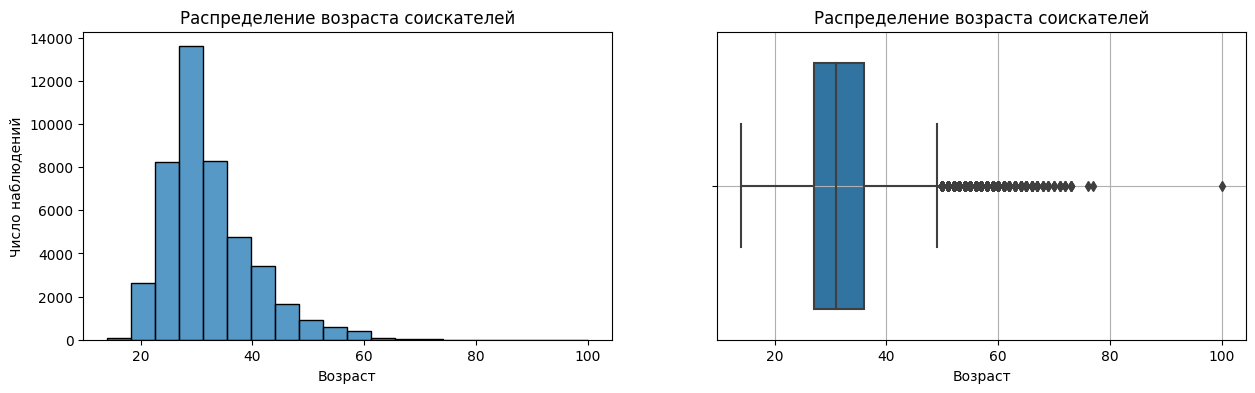

In [17]:
print("mode: ", hh_df['Возраст'].mode()[0])
print("min: ", hh_df['Возраст'].min())
print("max: ", hh_df['Возраст'].max())


fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))
histplot = sns.histplot(data=hh_df, x='Возраст',  bins=20, ax=axes[0]);
histplot.set_title('Распределение возраста соискателей');
histplot.set_xlabel('Возраст')
histplot.set_ylabel('Число наблюдений') 

boxplot = sns.boxplot(data=hh_df, x='Возраст', ax=axes[1]);
boxplot.set_title('Распределение возраста соискателей')
plt.grid()


## Выводы:

- Распределение возраста соискателей близко к нормальному с ассиметрией вправо.
- Мода распределения составляет 30 лет.
- Минимальное и максимальное значения признака составляют 14 и 100 лет соответственно.
- Возраст большинства соискателей находится в интервале от 18 до 49 лет. Межквартильный диапазон составляет от 27 до 36 лет.
- На распределении наблюдается одно аномальное значение - это соискатель с возрастом 100 лет
- 70 летние соискатели это наверное редкие случаи, но считать их аномалией не стоит. 
- то же и про 14 летних, по трудовому законодательству РФ устроится на работу можно с 14 лет, с согласия родителей и муниципального органа опеки.



2. Постройте распределение признака **"Опыт работы (месяц)"**. Опишите данное распределение, отвечая на следующие вопросы: чему равна мода распределения, каковы предельные значения признака, в каком примерном интервале находится опыт работы большинства соискателей? Есть ли аномалии для признака опыта работы, какие значения вы бы причислили к их числу?
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*

In [34]:
fig = px.histogram(
    data_frame = hh_df,
    x = 'Опыт работы (месяц)',
    title = 'Experience distribution',
    histnorm='percent',
    width=800,
    marginal='box'
    )
fig.show()

mode:  81.0
min:  1.0
max:  1188.0


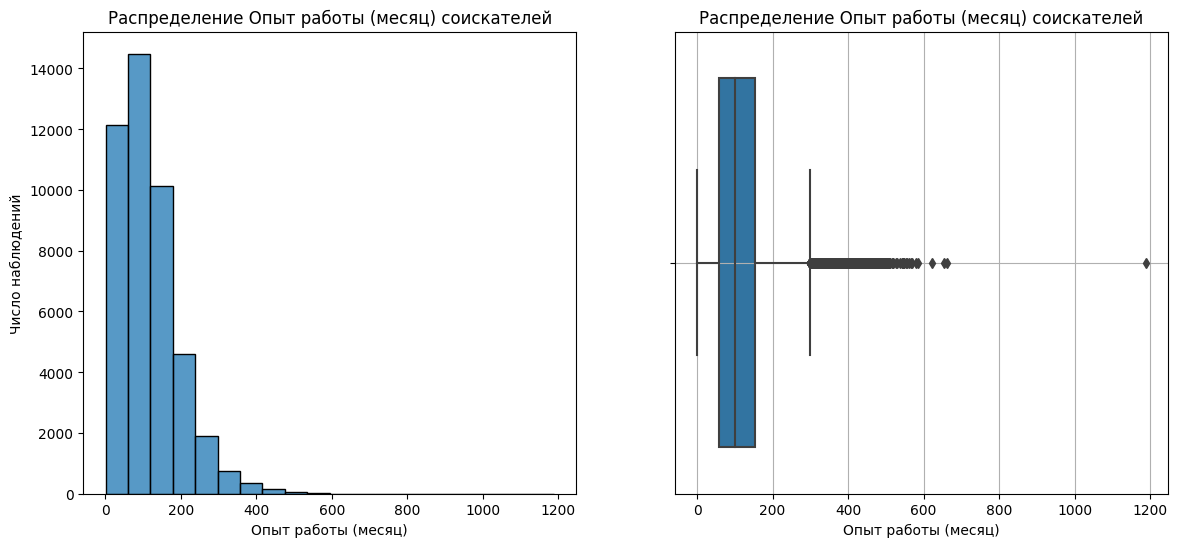

In [18]:
print("mode: ", hh_df['Опыт работы (месяц)'].mode()[0]);
print("min: ", hh_df['Опыт работы (месяц)'].min());
print("max: ", hh_df['Опыт работы (месяц)'].max());

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

histplot = sns.histplot(data=hh_df, x='Опыт работы (месяц)',  bins=20, ax=axes[0]);
histplot.set_title('Распределение Опыт работы (месяц) соискателей');
histplot.set_xlabel('Опыт работы (месяц)')
histplot.set_ylabel('Число наблюдений')

boxplot = sns.boxplot(data=hh_df, x='Опыт работы (месяц)', ax=axes[1]);
boxplot.set_title('Распределение Опыт работы (месяц) соискателей');
plt.grid()

## Выводы:

- Опыт работы также имеет вид нормального распределения с сильной ассиметрией вправо.
- Мода распределения 81 месяц.
- Минимальное и максимальное значения признака составляют 1 и 1188 месяцев соответственно.
- Опыт большинства соискателей находится в интервале от 1 до 300 месяцев. Межквартильный диапазон составляет от 57 до 154 месяцев.
- На распределении наблюдается одна аномалия 1188 месяцев, что равно 99 годам рабочего стажа.



3. Постройте распределение признака **"ЗП (руб)"**. Опишите данное распределение, отвечая на следующие вопросы: каковы предельные значения признака, в каком примерном интервале находится заработная плата большинства соискателей? Есть ли аномалии для признака ЗП? Обратите внимание на гигантские размеры желаемой заработной платы.
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*


mode:  50000.0
min:  1.0
max:  24304876.0


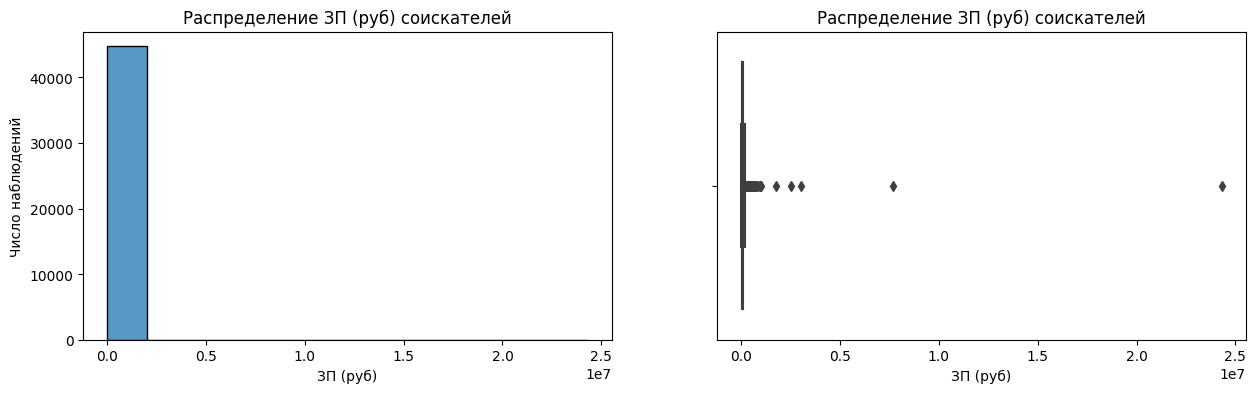

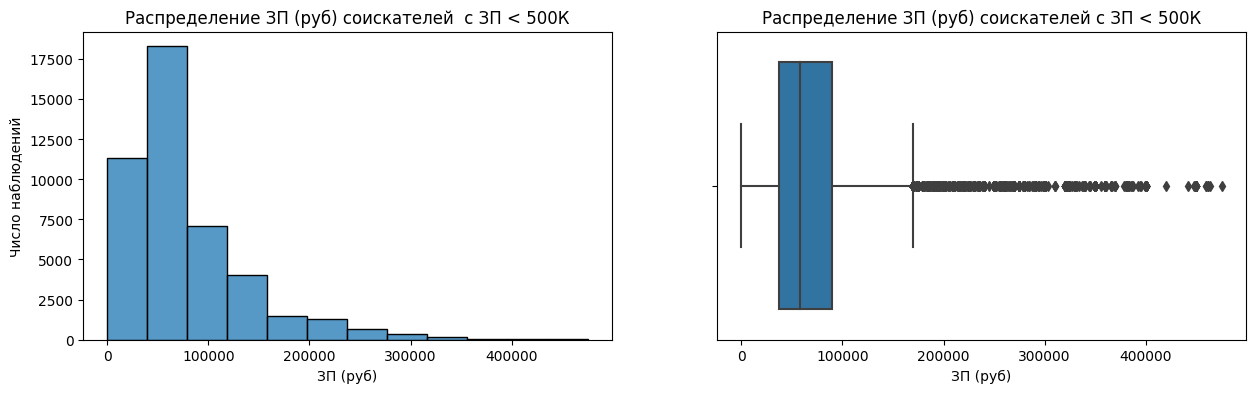

In [19]:
print("mode: ", hh_df['ЗП (руб)'].mode()[0]);
print("min: ", hh_df['ЗП (руб)'].min());
print("max: ", hh_df['ЗП (руб)'].max());

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))

histplot = sns.histplot(data=hh_df, x='ЗП (руб)',  bins=12, ax=axes[0]);
histplot.set_title('Распределение ЗП (руб) соискателей');
histplot.set_xlabel('ЗП (руб)')
histplot.set_ylabel('Число наблюдений')

boxplot = sns.boxplot(data=hh_df, x='ЗП (руб)', ax=axes[1]);
boxplot.set_title('Распределение ЗП (руб) соискателей');


fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))
filtered = hh_df[hh_df['ЗП (руб)'] < 500000 ]
histplot = sns.histplot(data=filtered, x='ЗП (руб)',  bins=12, ax=axes[0]);
histplot.set_title('Распределение ЗП (руб) соискателей  с ЗП < 500К');
histplot.set_xlabel('ЗП (руб)')
histplot.set_ylabel('Число наблюдений')

boxplot = sns.boxplot(data=filtered, x='ЗП (руб)', ax=axes[1]);
boxplot.set_title('Распределение ЗП (руб) соискателей с ЗП < 500К');



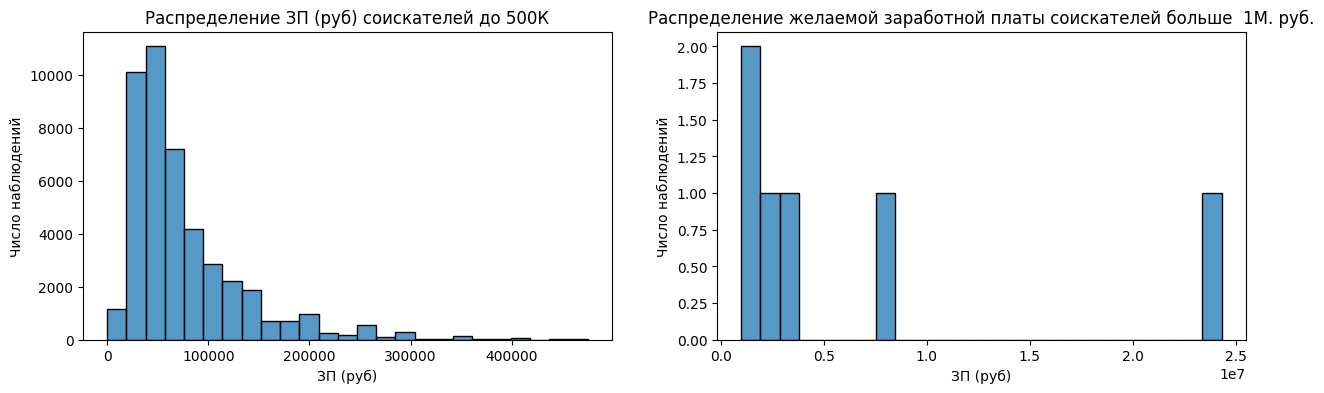

In [20]:
filteredTo500K = hh_df[hh_df['ЗП (руб)'] < 500000 ]
filteredFRom1M = hh_df[hh_df['ЗП (руб)'] >= 1000000 ]


fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))

histplot = sns.histplot(data=filteredTo500K, x='ЗП (руб)',  bins=25, ax=axes[0]);
histplot.set_title('Распределение ЗП (руб) соискателей до 500К');
histplot.set_xlabel('ЗП (руб)')
histplot.set_ylabel('Число наблюдений');

histplot = sns.histplot(data=filteredFRom1M, x='ЗП (руб)',  bins=25, ax=axes[1]);
histplot.set_title('Распределение желаемой заработной платы соискателей больше  1М. руб.')
histplot.set_xlabel('ЗП (руб)')
histplot.set_ylabel('Число наблюдений');


## Выводы (1):
- Большая часть данных сосредоточена в одном столбце. Поэтому отфильтруем их и построим ещё один график распределения для зарплаты меньше 500К. 
- Мода распределения составляет 50 тысяч рублей.
- Минимальное и максимальное значения признака желаемой заработной платы составляют 1 рубль и 24,3 миллиона рублей в месяц соответственно.
- Желаемая заработная плата большинства соискателей лежит винтервале от 2,5 до 150 тысяч рублей, межквартильный интервал составляет от 37 до 95 тысяч рублей.
- Наиболее вероятно, что сумма в 24,3 миллиона рублей является выбросом, возможно указано в другой валюте (как показал дальнейший анализ это зарплата в америке).
- Отбор по критерию "Желаемая ЗП в рублях меньше 500 тыс." показывает, что в этом интервале распределение зарплат близко к лог-нормальному. Также можно отметить выбросы и исследовать их дополнительно, но от 400 тыс руб в месяц - реальная зарплата например для топ-менеджера. 
- Большая часть соискателей ожидает зарплату от 20 до 60 тыс руб в месяц. Со снижением уровня ЗП количество соискателей c соответствующими зарплатными ожиданиями сильно снижается. 
- Столбец со значением до 10тыс также привлекает внимание, может быть предметом для дополнительных исследований (возможно частичная занятость или труд, не требующий высокой квалификации).


4. Постройте диаграмму, которая показывает зависимость **медианной** желаемой заработной платы (**"ЗП (руб)"**) от уровня образования (**"Образование"**). Используйте для диаграммы данные о резюме, где желаемая заработная плата меньше 1 млн рублей.
*Сделайте выводы по представленной диаграмме: для каких уровней образования наблюдаются наибольшие и наименьшие уровни желаемой заработной платы? Как вы считаете, важен ли признак уровня образования при прогнозировании заработной платы?*

Образование
высшее                 60000.0
неоконченное высшее    50000.0
среднее                40000.0
среднее специальное    40000.0
Name: ЗП (руб), dtype: float64

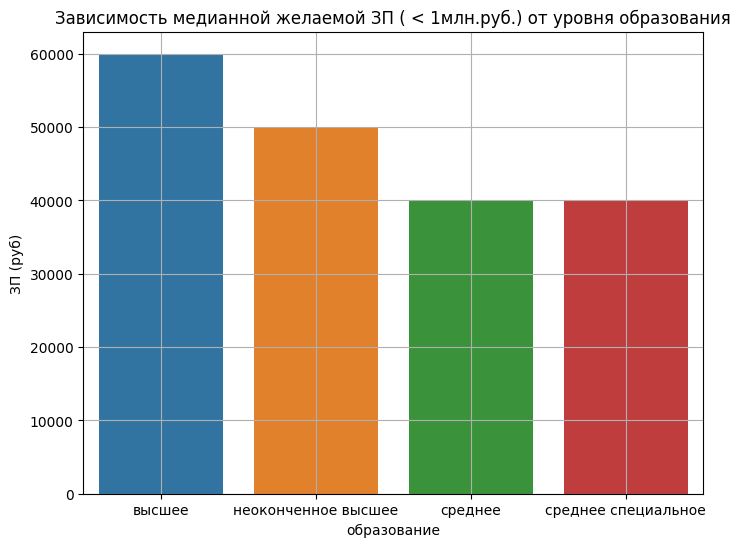

In [21]:
filtered = hh_df[hh_df['ЗП (руб)'] < 1000000 ]

grouped = filtered.groupby(['Образование'])['ЗП (руб)'].median()
display(grouped)

grouped_df = filtered.groupby(['Образование'])['ЗП (руб)'].median()
grouped_df = grouped.reset_index()
grouped_df.columns = ['Образование', 'ЗП (руб)']

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(8, 6))

histplot = sns.barplot(
    data=grouped_df,
    x='Образование',
    y='ЗП (руб)',
    )
histplot.set_title('Зависимость медианной желаемой ЗП ( < 1млн.руб.) от уровня образования');
histplot.set_xlabel('образование')
histplot.set_ylabel('ЗП (руб)')
plt.grid()

## Выводы:
Все очень ожидаемо и понятно

- Наблюдается прямая зависимость зарплатных ожиданий соискателей от уровня образования: чем выше уровень образования, тем выше уровень медианной желаемой ЗП. 
- Для людей со средним и средним специальным образованием видим равные значения, возможно эти категории можно объединить в одну для целей прогнозирования ЗП. 
- Образование является одним из ключевых признаков при прогнозировании заработной платы.

5. Постройте диаграмму, которая показывает распределение желаемой заработной платы (**"ЗП (руб)"**) в зависимости от города (**"Город"**). Используйте для диаграммы данные о резюме, где желая заработная плата меньше 1 млн рублей.
*Сделайте выводы по полученной диаграмме: как соотносятся медианные уровни желаемой заработной платы и их размах в городах? Как вы считаете, важен ли признак города при прогнозировании заработной платы?*

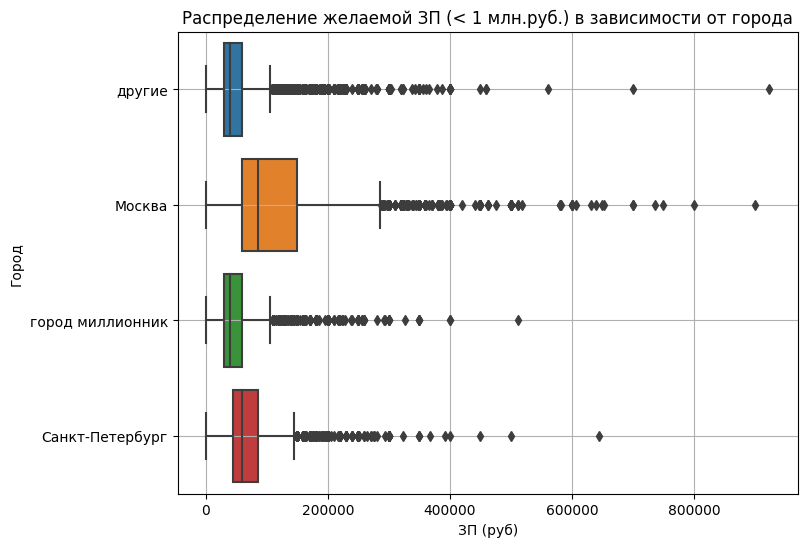

In [22]:
filtered = hh_df[hh_df['ЗП (руб)'] < 1000000 ]

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(8, 6))

histplot = sns.boxplot(
    data=filtered,
    x='ЗП (руб)',
    y='Город',
    )
histplot.set_title('Распределение желаемой ЗП (< 1 млн.руб.) в зависимости от города');
histplot.set_xlabel('ЗП (руб)')
histplot.set_ylabel('Город')
plt.grid()


## Выводы:

- В городах-миллионниках и городах из категории другие наблюдаются идентичные медианные заработные платы и разброс 40 и 105 тыс.руб. соответственно.
- В столице медианная зароботная плата составляет 85 тыс.руб., что более чем в 2 раза больше чем в большинстве городов России. Разброс в заработной плате больше почти в 3 раза - 285 тыс.руб.
- Санкт-Петербург занимает промежуточное место между Москвой и остальной частью России по медианной заработной плате - составляющей 60 тыс.руб. и разбросу - 145 тыс.руб.
- в "других" городах есть сильный выброс, который при дальнейшем анализе показал, что соискатель ищет работу за рубежом.
- Можно сделать вывод, что признак Город очень важен при прогнозировании ЗП, в случае если город - это Москва или Санкт-Петербург, так как данные по двум столицам сильно отличаются от того, что мы наблюдаем в регионах. При этом ожидания по ЗП в Москве и Санкт-Петербурге также сильно отличаются между собой.




6. Постройте **многоуровневую столбчатую диаграмму**, которая показывает зависимость медианной заработной платы (**"ЗП (руб)"**) от признаков **"Готовность к переезду"** и **"Готовность к командировкам"**. Проанализируйте график, сравнив уровень заработной платы в категориях.

MoveReloc   Flag  ЗП (руб)
0       Готовность к переезду  False   50000.0
1       Готовность к переезду   True   64517.1
2  Готовность к командировкам  False   40000.0
3  Готовность к командировкам   True   64679.4

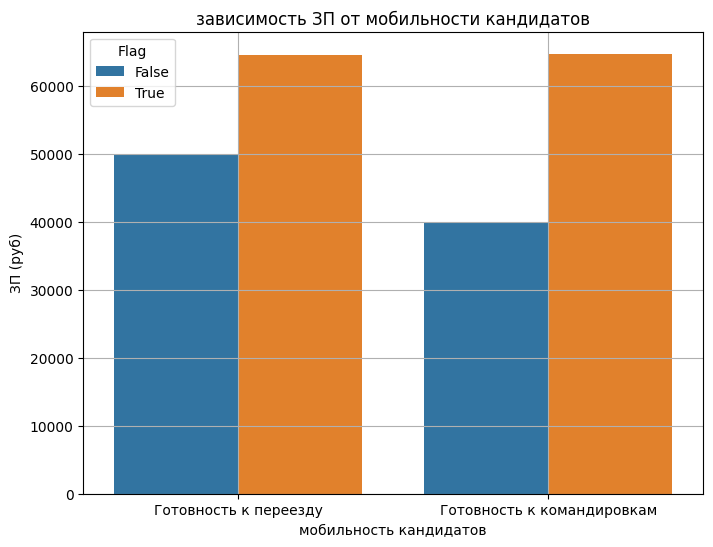

In [23]:
grouped_reloc = hh_df.groupby(['Готовность к переезду'])[['ЗП (руб)']].median()
grouped_trips = hh_df.groupby(['Готовность к командировкам'])[['ЗП (руб)']].median()

grouped_reloc = grouped_reloc.reset_index()
grouped_reloc.columns = ['Готовность к переезду', 'ЗП (руб)']
grouped_trips=grouped_trips.reset_index()
grouped_trips.columns = ['Готовность к командировкам', 'ЗП (руб)']

concatMovedReloc1=pd.DataFrame()
concatMovedReloc1['MoveReloc'] = grouped_reloc['Готовность к переезду'].apply(lambda x: 'Готовность к переезду')
concatMovedReloc1['Flag'] = grouped_reloc['Готовность к переезду'].apply(lambda x: x)
concatMovedReloc1['ЗП (руб)'] = grouped_reloc['ЗП (руб)'].apply(lambda x: x)

concatMovedReloc2=pd.DataFrame()
concatMovedReloc2['MoveReloc'] = grouped_trips['Готовность к командировкам'].apply(lambda x: 'Готовность к командировкам')
concatMovedReloc2['Flag'] = grouped_trips['Готовность к командировкам'].apply(lambda x: x)
concatMovedReloc2['ЗП (руб)'] = grouped_trips['ЗП (руб)'].apply(lambda x: x)

concatMovedReloc = pd.concat([concatMovedReloc1, concatMovedReloc2], ignore_index=True)

display(concatMovedReloc)

#creating subplots
axes = plt.subplots(nrows=1, ncols=1, figsize=(8, 6))

histplot = sns.barplot(
    data=concatMovedReloc, 
    x='MoveReloc',  
    y='ЗП (руб)',
    hue='Flag',
    #color=['green', 'lime']
    )
sns.color_palette("husl", 8)
histplot.set_title('зависимость ЗП от мобильности кандидатов')
histplot.set_xlabel('мобильность кандидатов')
histplot.set_ylabel('ЗП (руб)')
plt.grid()

## выводы
- Соискатели указавшие готовность к переездам и командировкам указывают большую желаемую заработную плату медианное значение 68 тыс.руб.
- С точки зрения соискателей готовность к командировкам стоит больше чем готовность к переезду примерно на 10 тыс.руб.
- Разница в желаемой заработной плате между соискателями готовыми к переездам и командировкам и соискателями не желающими переезжать и ездить по командировкам составляет 28 тыс. руб.



7. Постройте сводную таблицу, иллюстрирующую зависимость **медианной** желаемой заработной платы от возраста (**"Возраст"**) и образования (**"Образование"**). На полученной сводной таблице постройте **тепловую карту**. Проанализируйте тепловую карту, сравнив показатели внутри групп.

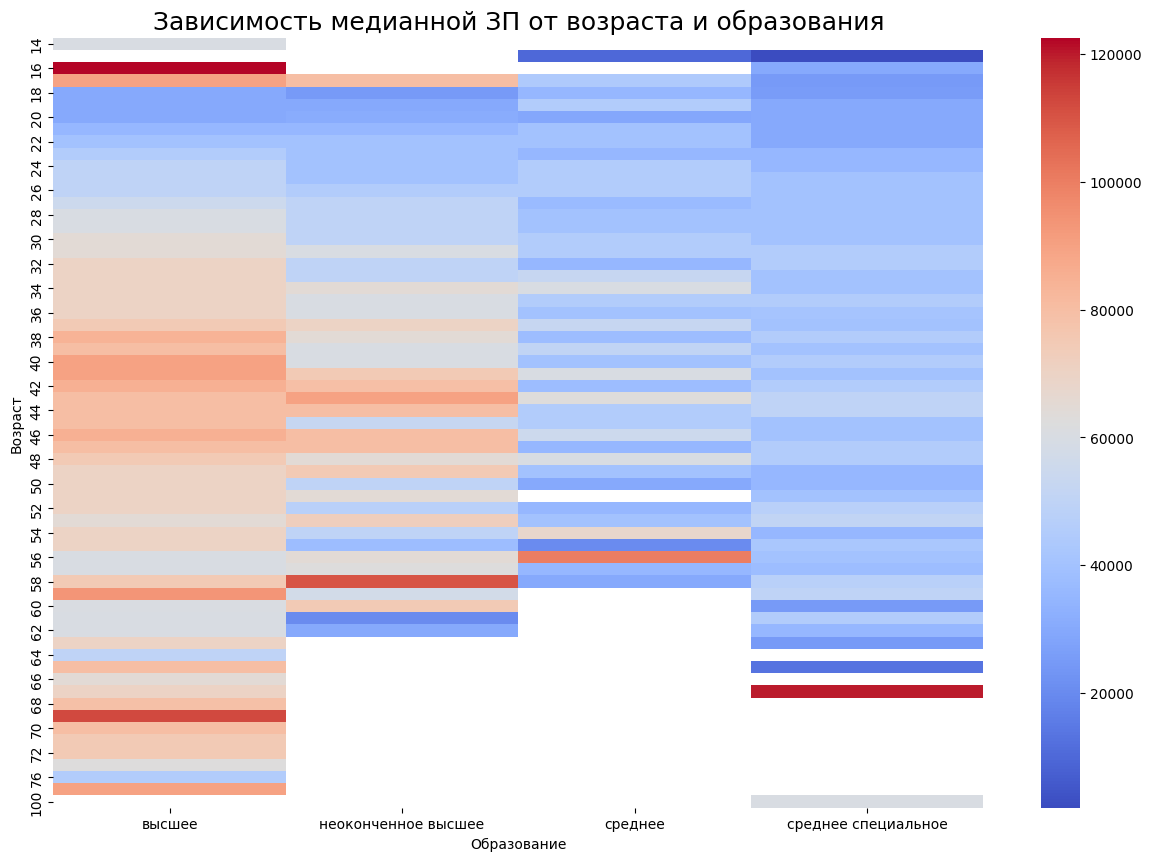

In [24]:
pivot = hh_df.pivot_table(values ='ЗП (руб)', index='Возраст', columns='Образование', aggfunc='median')

plt.figure(figsize=(15,10))
heatmap = sns.heatmap(data=pivot, cmap='coolwarm')
heatmap.set_title('Зависимость медианной ЗП от возраста и образования', fontsize=18);


## Выводы:

- На диаграмме проявились новые аномалии: например высшее образование у соискателей в возрасте до 17 лет, а также требование зарплаты 120 тыс. руб. со среднеспециальным образованием и пенсионным возрастом 67 лет.
- в среднем на всех 4 категориях уровня образования просматривается равномерное увеличение желаемой заработной платы от 18 до 40 лет и уменьшение приближаясь к пенсионному возрасту.
- Наибольшая интенсивность увеличения заработной платы и наиболее плавная наблюдается у соискателей с высшим образованием, самая низкая интенсивность роста заработной платы у соискателей со среднеспециальным образованием.
- Во всех четырех категориях образования наблюдается наибольшая неравномерность в желаемой заработной плате в возрасте от 50 до 65, а у соискателей с высшим образованием до 75 лет. Высокие заработные платы для соискателей данных возрастных групп могут быть обусловленны наличием уникальных навыков и знаний, что указывает на потребность анализа рынка труда по специализации для лиц с высшим и неоконченным высшим образованием.
- Соискатели с высшим образованием сохраняют работоспособность до глубокой старости, при этом стремятся получать зарплаты высокого уровне, сравнимом с 30-35 летними соискателями такого же уровня образования.



8. Постройте **диаграмму рассеяния**, показывающую зависимость опыта работы (**"Опыт работы (месяц)"**) от возраста (**"Возраст"**). Опыт работы переведите из месяцев в года, чтобы признаки были в едином масштабе. Постройте на графике дополнительно прямую, проходящую через точки (0, 0) и (100, 100). Данная прямая соответствует значениям, когда опыт работы равен возрасту человека. Точки, лежащие на этой прямой и выше нее - аномалии в наших данных (опыт работы больше либо равен возрасту соискателя)

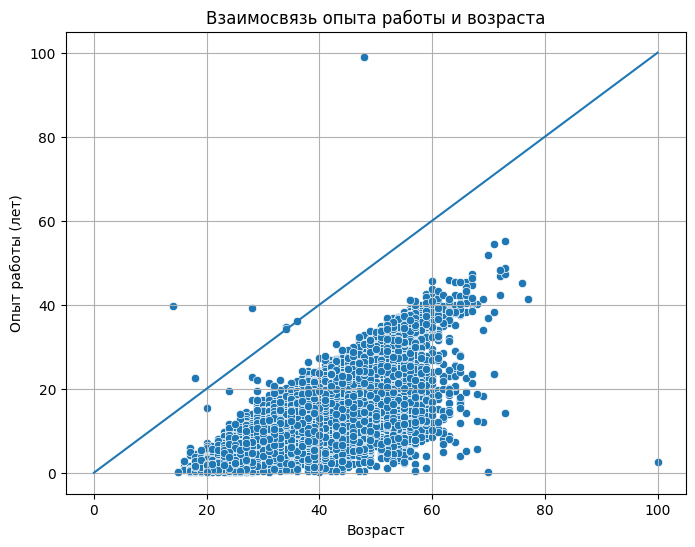

In [25]:
# Создадим дополнительное поле, удалим в конце блока кода
hh_df['Опыт работы (лет)'] = hh_df['Опыт работы (месяц)'].apply(lambda x: x/12)

# Линейная диаграмма, у=х, минимум и максимум определены исходя из данных fig1
df_xy = pd.DataFrame({
    'X': [0,10,20,30,40,50,60,70,80,90,100],
    'Y': [0,10,20,30,40,50,60,70,80,90,100]})


axes = plt.subplots(nrows=1, ncols=1, figsize=(8, 6))

scatplot = sns.scatterplot(
    data=hh_df,
    x='Возраст', 
    y='Опыт работы (лет)',    
    )

scatplot = sns.lineplot(x = "X", y = "Y", data=df_xy)

scatplot.set_title('Взаимосвязь опыта работы и возраста')
plt.grid()
plt.show()

# Удаление служебного столбца
hh_df = hh_df.drop(['Опыт работы (лет)'], axis=1)


## Выводы:

- На диаграмме проявились аномальные/ошибочные данные: 7 точек лежащие на границе области где опыт работы больше возраста и над ней.
- Так же вызывают сомнения в достоверности данные об опыте работы с разницей с возрастом менее 14 лет. Т.е. соискатели которые начали трудовую деятельность не достигнув трудоспособного возраста по законодательству РФ.
- К аномалиям следуе отнести и точку с возрастом 100 лет и стажем 2,5 года. Даже если это достоверная информация её можно считать единичным выбросом. На основе полученных данных следует исключить данные записи из рассмотрения.



**Дополнительные баллы**

Для получения 2 дополнительных баллов по разведывательному анализу постройте еще два любых содержательных графика или диаграммы, которые помогут проиллюстрировать влияние признаков/взаимосвязь между признаками/распределения признаков. Приведите выводы по ним. Желательно, чтобы в анализе участвовали признаки, которые мы создавали ранее в разделе "Преобразование данных".


NameError: name 'data_men' is not defined

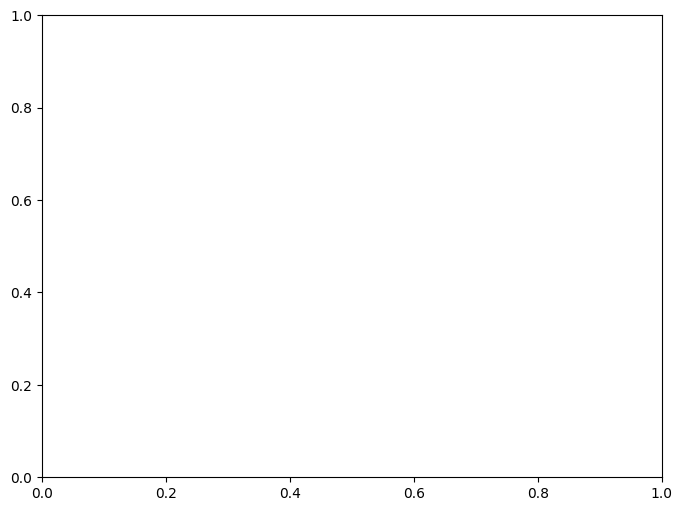

In [26]:
# Проанализируем распределение зарплат до 500 тыс руб в разрезе пола кандидатов
axes = plt.subplots(nrows=1, ncols=1, figsize=(8, 6))

histplot = sns.histplot(data=data_men, x='ЗП (руб)',  bins=10, color='green');
histplot = sns.histplot(data=data_women, x='ЗП (руб)',  bins=10, color='lime');


sns.color_palette("husl", 8)
histplot.set_title('Распределение зарплат (< 500 тыс руб) в разрезе пола');
histplot.set_xlabel('ЗП (руб)')
histplot.set_ylabel('Число наблюдений')
plt.grid()


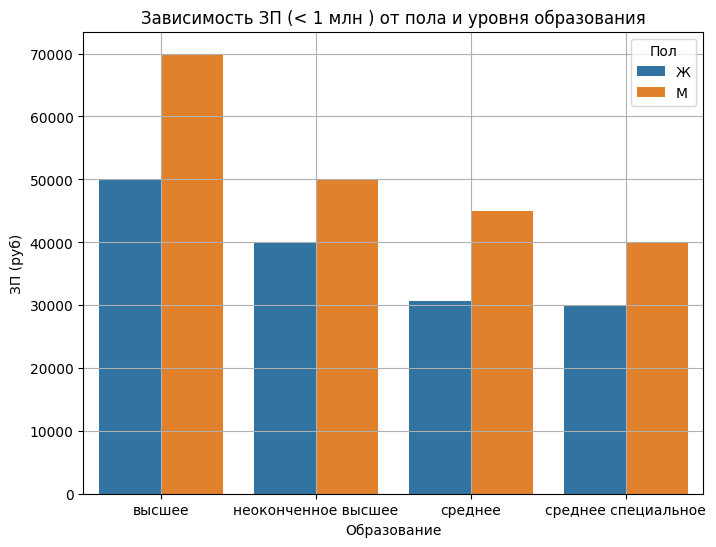

In [ ]:
# Проанализируем распределение зарплат в разрезе пола кандидатов и образования
filtered = hh_df[hh_df['ЗП (руб)'] < 1000000 ]
grouped = filtered.groupby(['Пол', 'Образование'], as_index=False)['ЗП (руб)'].median()
#display(grouped)

axes = plt.subplots(nrows=1, ncols=1, figsize=(8, 6))

histplot = sns.barplot(
    data=grouped, 
    x='Образование',  
    y='ЗП (руб)',
    hue='Пол',
    #color=['green', 'lime']
    )
sns.color_palette("husl", 8)
histplot.set_title('Зависимость ЗП (< 1 млн ) от пола и уровня образования')
histplot.set_xlabel('Образование')
histplot.set_ylabel('ЗП (руб)')
plt.grid()

## Выводы
- Детализация по признаку Пол приведённые графики распределения зарплат (меньше 500 тыс руб, чтобы исключить выбросы), и зависимости ЗП от уровня образования. 
- Распределение ожидаемых ЗП для женщин отличается, оно более сглаженное. Основные причины полагаю что следующие: женских резюме в несколько раз меньше (примерно пятая часть от общего количества), и в целом зарплатные ожидания женщин ниже. Мы можем это увидеть на втором графике. 
- В любой категории образования женщины-кандидаты претендуют на меньшую ЗП, чем мужчины. Самая большая разница наблюдается для людей со средним образованием, она составляет более 30 процентов.


# Очистка данных

1. Начнем с дубликатов в наших данных. Найдите **полные дубликаты** в таблице с резюме и удалите их. 

In [ ]:
#test()
hh_df_clean = hh_df.copy()
#hh_df_clean = hh_data.copy()

#display(hh_df_clean[hh_df_clean['Ищет работу на должность:'] == 'системный администратор, информационная безопасность' ])

duplicates=hh_df_clean.duplicated()
#display(hh_df_clean[duplicates])
print(f'Количество полных дубликатов в данных: {hh_df_clean[duplicates].shape[0]}')

# Количество полных дубликатов в данных: 161
hh_df_clean.drop_duplicates(inplace=True)


Количество полных дубликатов в данных: 161


2. Займемся пропусками. Выведите информацию **о числе пропусков** в столбцах. 

In [ ]:
#coll_nill = hh_df.isnull().sum()

#display(hh_df_clean.info())

coll_nill=hh_df_clean.isnull()
#display(blank_data)
cols=coll_nill.columns
# В цикле выведем информацию о признаках с пропусками
for i in cols:
    gaps_count=coll_nill[coll_nill[i]][i].count()
    if gaps_count > 0:
        print(f"признак '{i}' содержит {gaps_count} пропуск(ов)")

#2 записи в признаке "Опыт работы (месяц)" содержали изначально "Не указано", но были заменены на NaN, здесь мы их вычитаем, потому что они не были "пустыми" в начальном сете

признак 'Последнее/нынешнее место работы' содержит 1 пропуск(ов)
признак 'Последняя/нынешняя должность' содержит 2 пропуск(ов)
признак 'Опыт работы (месяц)' содержит 168 пропуск(ов)


3. Итак, у нас есть пропуски в 3ех столбцах: **"Опыт работы (месяц)"**, **"Последнее/нынешнее место работы"**, **"Последняя/нынешняя должность"**. Поступим следующим образом: удалите строки, где есть пропуск в столбцах с местом работы и должностью. Пропуски в столбце с опытом работы заполните **медианным** значением.

In [367]:
# Удалим все строки с пропусками в двух столбцах. Было 44 744 строки
hh_df_clean = hh_df_clean.dropna(subset=['Последнее/нынешнее место работы'], how='all', axis=0)
hh_df_clean = hh_df_clean.dropna(subset=['Последняя/нынешняя должность'], how='all', axis=0)

# Заполним пропуски опыта работы медианой
values = {'Опыт работы (месяц)': hh_df['Опыт работы (месяц)'].median()}
hh_df_clean = hh_df_clean.fillna(values)
print("Cреднее значение в столбце Опыт работы (месяц) составляет:",hh_df_clean['Опыт работы (месяц)'].mean())

# Проверка структуры данных и количества строк
#print(hh_df.info())

Cреднее значение в столбце Опыт работы (месяц) составляет: 114.35777573405711


4. Мы добрались до ликвидации выбросов. Сначала очистим данные вручную. Удалите резюме, в которых указана заработная плата либо выше 1 млн. рублей, либо ниже 1 тыс. рублей.

In [368]:
#  выбросы 
mask = ((hh_df_clean['ЗП (руб)'] > 1e6) | (hh_df_clean['ЗП (руб)'] < 1000))
print("Количество найденных выбросов: ", hh_df_clean[mask].shape[0])

# остальные строки
mask = ((hh_df_clean['ЗП (руб)'] <= 1e6) & (hh_df_clean['ЗП (руб)'] >= 1000))
hh_df_clean = hh_df_clean[mask]

Количество найденных выбросов:  89


5. В процессе разведывательного анализа мы обнаружили резюме, в которых **опыт работы в годах превышал возраст соискателя**. Найдите такие резюме и удалите их из данных


In [369]:
#  выбросы 
mask = (hh_df_clean['Опыт работы (месяц)']/12 > hh_df_clean['Возраст'])
print("Количество найденных выбросов: ", hh_df_clean[mask].shape[0])

#  остальные строки
mask = (hh_df_clean['Опыт работы (месяц)']/12 <= hh_df_clean['Возраст'])
hh_df_clean = hh_df_clean[mask]


Количество найденных выбросов:  7


6. В результате анализа мы обнаружили потенциальные выбросы в признаке **"Возраст"**. Это оказались резюме людей чересчур преклонного возраста для поиска работы. Попробуйте построить распределение признака в **логарифмическом масштабе**. Добавьте к графику линии, отображающие **среднее и границы интервала метода трех сигм**. Напомним, сделать это можно с помощью метода axvline. Например, для построение линии среднего будет иметь вид:

`histplot.axvline(log_age.mean(), color='k', lw=2)`

В какую сторону асимметрично логарифмическое распределение? Напишите об этом в комментарии к графику.
Найдите выбросы с помощью метода z-отклонения и удалите их из данных, используйте логарифмический масштаб. Давайте сделаем послабление на **1 сигму** (возьмите 4 сигмы) в **правую сторону**.

Выведите таблицу с полученными выбросами и оцените, с каким возрастом соискатели попадают под категорию выбросов?

Число выбросов по методу z-отклонения: 3
Результирующее число записей: 44482


Ищет работу на должность: Последнее/нынешнее место работы  \
31137  Менеджер по работе с клиентами           ООО "ФёрстКэшКомпани"   
32950                 Тестировщик игр                        OOO ЖМЫХ   
33654            Frontend-разработчик                       Freelance   

         Последняя/нынешняя должность Обновление резюме        Авто  \
31137  Менеджер по работе с клиентами        2019-06-04  Не указано   
32950                  Тестировщик ПО        2019-09-04  Не указано   
33654            Frontend-разработчик        2019-04-19  Не указано   

               Образование Пол  Возраст  Опыт работы (месяц)            Город  \
31137              среднее   М       15                  2.0  Санкт-Петербург   
32950  среднее специальное   М       15                  3.0           другие   
33654  среднее специальное   М      100                 30.0  Санкт-Петербург   

       Готовность к переезду  Готовность к командировкам  ЗП (руб)  log_age  
31137                  False                       False   10000.0  2.70805  
32950                  False                       False    2000.0  2.70805  
33654                  False                        True   60000.0  4.60517

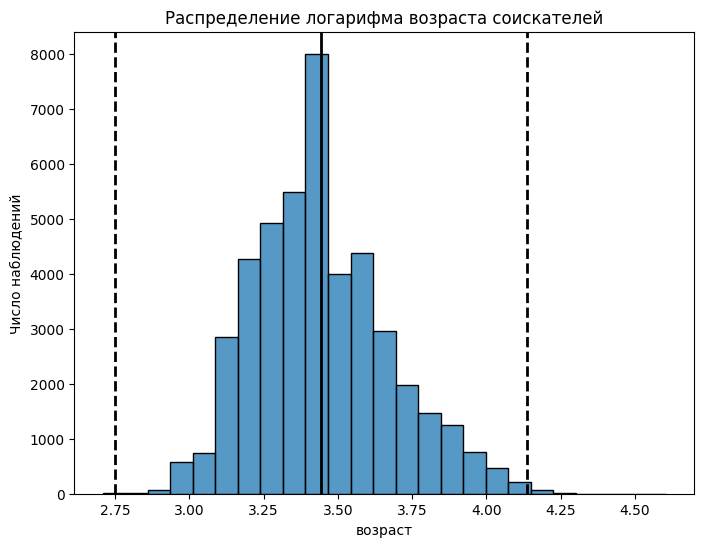

In [370]:
# Логарифмирование признака Возраст и построение распределения
hh_df_clean['log_age']= np.log(hh_df_clean['Возраст'])

axes = plt.subplots(figsize=(8, 6))

histplot = sns.histplot(data=hh_df_clean, x='log_age',  bins=25);
histplot.set_title('Распределение логарифма возраста соискателей');
histplot.set_xlabel('возраст')
histplot.set_ylabel('Число наблюдений')
histplot.axvline(hh_df_clean['log_age'].mean(), color='k', lw=2)
histplot.axvline(hh_df_clean['log_age'].mean()+ 3 * hh_df_clean['log_age'].std(), color='k', ls='--', lw=2)
histplot.axvline(hh_df_clean['log_age'].mean()- 3 * hh_df_clean['log_age'].std(), color='k', ls='--', lw=2)



# Расчёт выбросов по медоду z-отклонений и удаление выбросов
x = hh_df_clean['log_age']
mu = x.mean()
sigma = x.std()
lower_bound = mu - 3 * sigma  
upper_bound = mu + 4 * sigma # послабление на 1 сигму в правую сторону - противоположную ассимметрии распределения
outliers = hh_df_clean[(x < lower_bound) | (x > upper_bound)]
hh_df_clean = hh_df_clean[(x > lower_bound) & (x < upper_bound)]

print(f'Число выбросов по методу z-отклонения: {outliers.shape[0]}')
print(f'Результирующее число записей: {hh_df_clean.shape[0]}')

display(outliers)

## Выводы
распределение логарифмического преобразования стало нормальным c отклонением вправо. 
методом 3х сигм находим 3 отклонения , два по 15 лет и одно 100 лет.


In [ ]:
#Сохраним полученные данные
#hh_df_clean.to_csv('dst-3.0_16_1_hh_database_cleared.csv')